<a href="https://colab.research.google.com/github/guanyuq03/ECON5200-Applied-Data-Analytics-in-Economics/blob/main/Class%202/%20%5BLab_2%5D_Deflating_History_with_FRED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install fredapi

In [15]:
import pandas as pd
from fredapi import Fred

In [16]:
fred = Fred(api_key='b46359d978b6550ab8cad23783c4ba65')

In [17]:
print("Fetching data from Fred...")
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

df = pd.DataFrame({'National_Wage': wages, 'CPI': cpi})

df = df.dropna()

print(df.head())
print(df.tail())

Fetching data from Fred...
            National_Wage    CPI
1964-01-01           2.50  30.94
1964-02-01           2.50  30.91
1964-03-01           2.51  30.94
1964-04-01           2.52  30.95
1964-05-01           2.52  30.98
            National_Wage      CPI
2025-07-01          31.35  322.132
2025-08-01          31.45  323.364
2025-09-01          31.52  324.368
2025-11-01          31.73  325.031
2025-12-01          31.76  326.030


In [18]:
def get_real_wage(nominal_col, cpi_col):
  cpi_today = cpi_col.iloc[-1]
  real_col = (nominal_col / cpi_col) * cpi_today
  return real_col

df["Real_Wage"] = get_real_wage(df["National_Wage"], df["CPI"])
print(df.tail())

            National_Wage      CPI  Real_Wage
2025-07-01          31.35  322.132  31.729355
2025-08-01          31.45  323.364  31.709292
2025-09-01          31.52  324.368  31.681502
2025-11-01          31.73  325.031  31.827524
2025-12-01          31.76  326.030  31.760000


In [19]:
import matplotlib.pyplot as plt

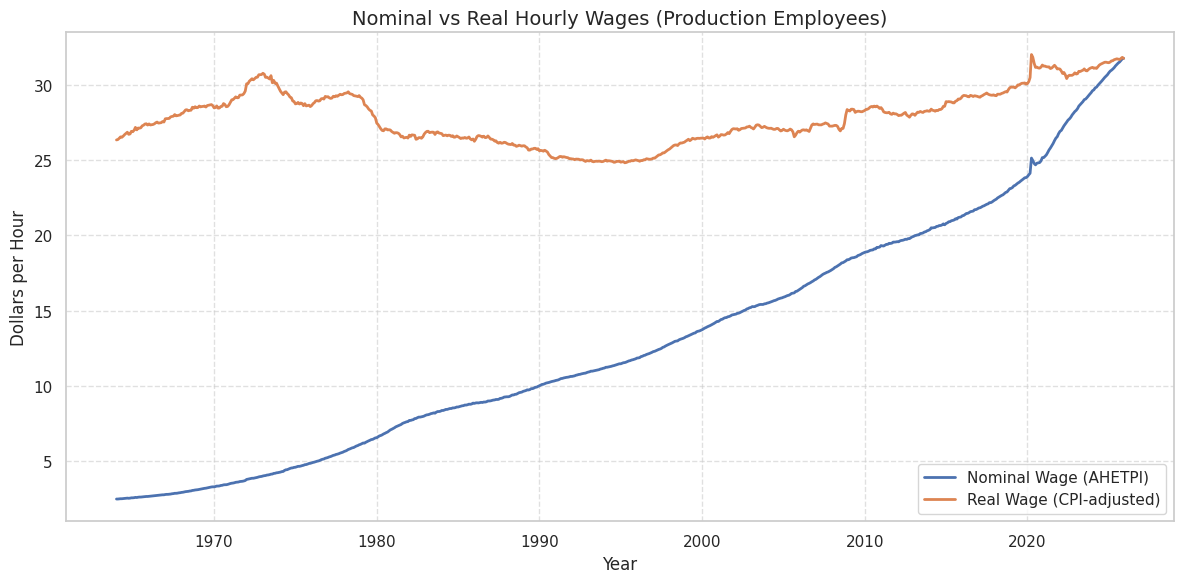

In [25]:
# Step 3: Visualization (Nominal vs Real)
plt.figure(figsize=(12, 6))

plt.plot(df.index, df["National_Wage"], label="Nominal Wage (AHETPI)", linewidth=2)
plt.plot(df.index, df["Real_Wage"], label="Real Wage (CPI-adjusted)", linewidth=2)

plt.title("Nominal vs Real Hourly Wages (Production Employees)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Dollars per Hour")

plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

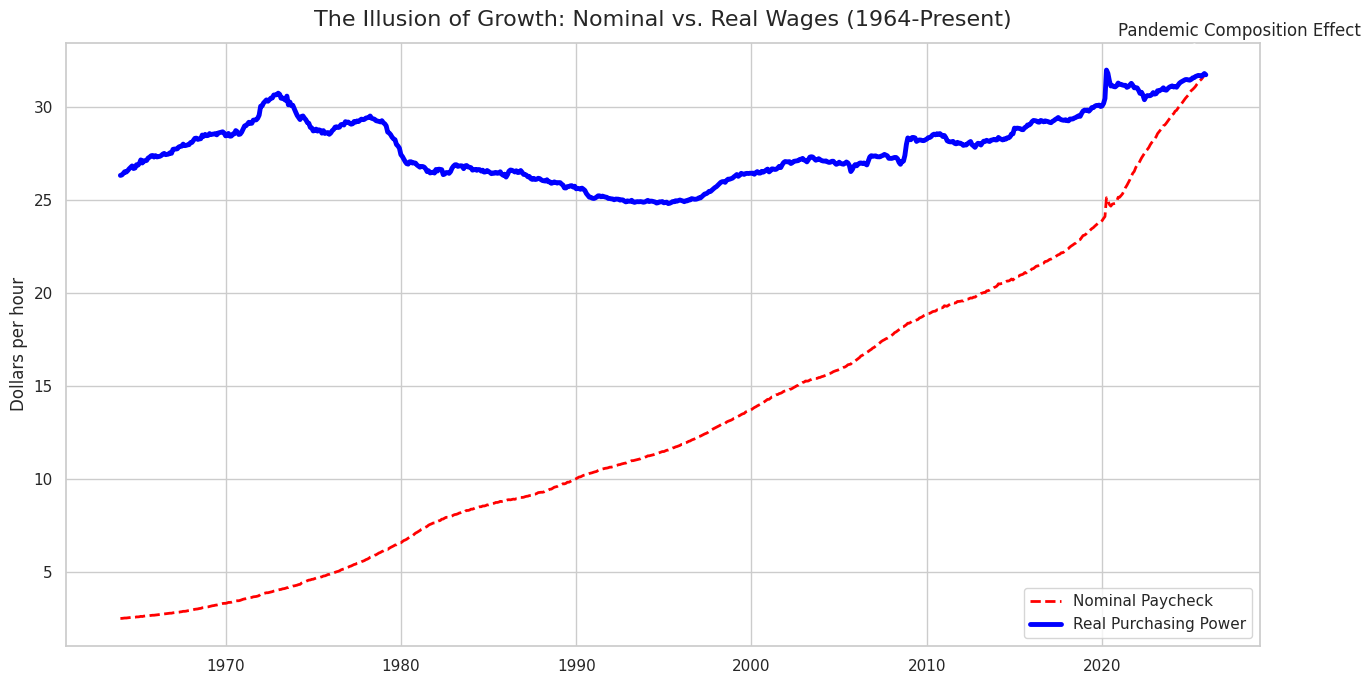

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Theme
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(14, 7))

# Lines
ax.plot(
    df.index, df["National_Wage"],
    linestyle="--", color="red", linewidth=2,
    label="Nominal Paycheck"
)
ax.plot(
    df.index, df["Real_Wage"],
    linestyle="-", color="blue", linewidth=3.5,
    label="Real Purchasing Power"
)

# Title + labels
ax.set_title("The Illusion of Growth: Nominal vs. Real Wages (1964-Present)", fontsize=16, pad=12)
ax.set_xlabel("")
ax.set_ylabel("Dollars per hour")

# Annotation: 2020 spike (peak within 2020)
real_2020 = df.loc[(df.index >= "2020-01-01") & (df.index <= "2020-12-31"), "Real_Wage"].dropna()

if not real_2020.empty:
    spike_date = real_2020.idxmax()
    spike_value = real_2020.max()

    ax.annotate(
        "Pandemic Composition Effect",
        xy=(spike_date, spike_value),
        xytext=(spike_date + pd.DateOffset(months=8), spike_value * 1.05),
        arrowprops=dict(arrowstyle="->", lw=1.5),
        fontsize=12,
        ha="left",
        va="bottom"
    )

ax.legend(frameon=True)
plt.tight_layout()
plt.show()

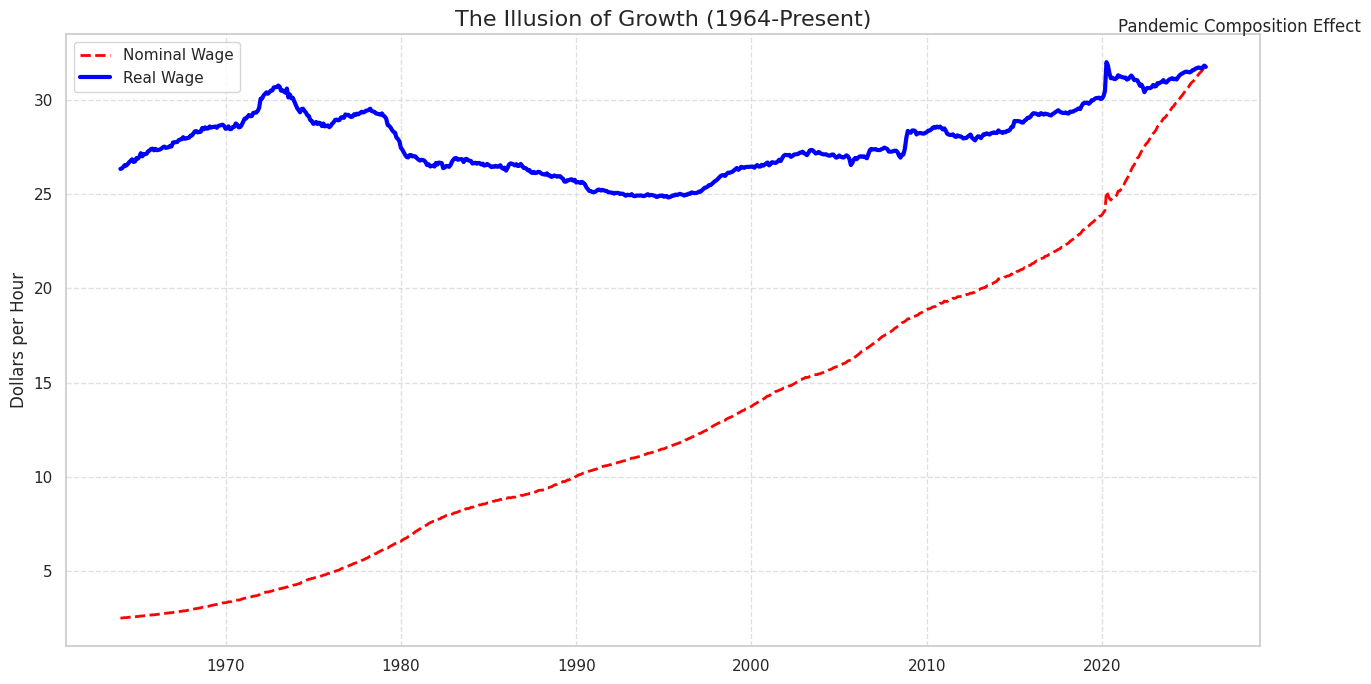

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Basic Illusion of Growth Visualization ---

plt.figure(figsize=(14, 7))

# Plot Nominal and Real Wages
plt.plot(
    df.index,
    df["National_Wage"],
    linestyle="--",
    color="red",
    linewidth=2,
    label="Nominal Wage"
)

plt.plot(
    df.index,
    df["Real_Wage"],
    linestyle="-",
    color="blue",
    linewidth=3,
    label="Real Wage"
)

# Title and labels
plt.title("The Illusion of Growth (1964-Present)", fontsize=16)
plt.ylabel("Dollars per Hour")
plt.xlabel("")

# --- Annotate the 2020 Pandemic Spike ---
real_2020 = df.loc[
    (df.index >= "2020-01-01") & (df.index <= "2020-12-31"),
    "Real_Wage"
].dropna()

if not real_2020.empty:
    spike_date = real_2020.idxmax()
    spike_value = real_2020.max()

    plt.annotate(
        "Pandemic Composition Effect",
        xy=(spike_date, spike_value),
        xytext=(spike_date + pd.DateOffset(months=8), spike_value * 1.05),
        arrowprops=dict(arrowstyle="->", linewidth=1.5),
        fontsize=12
    )

# Legend and layout
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

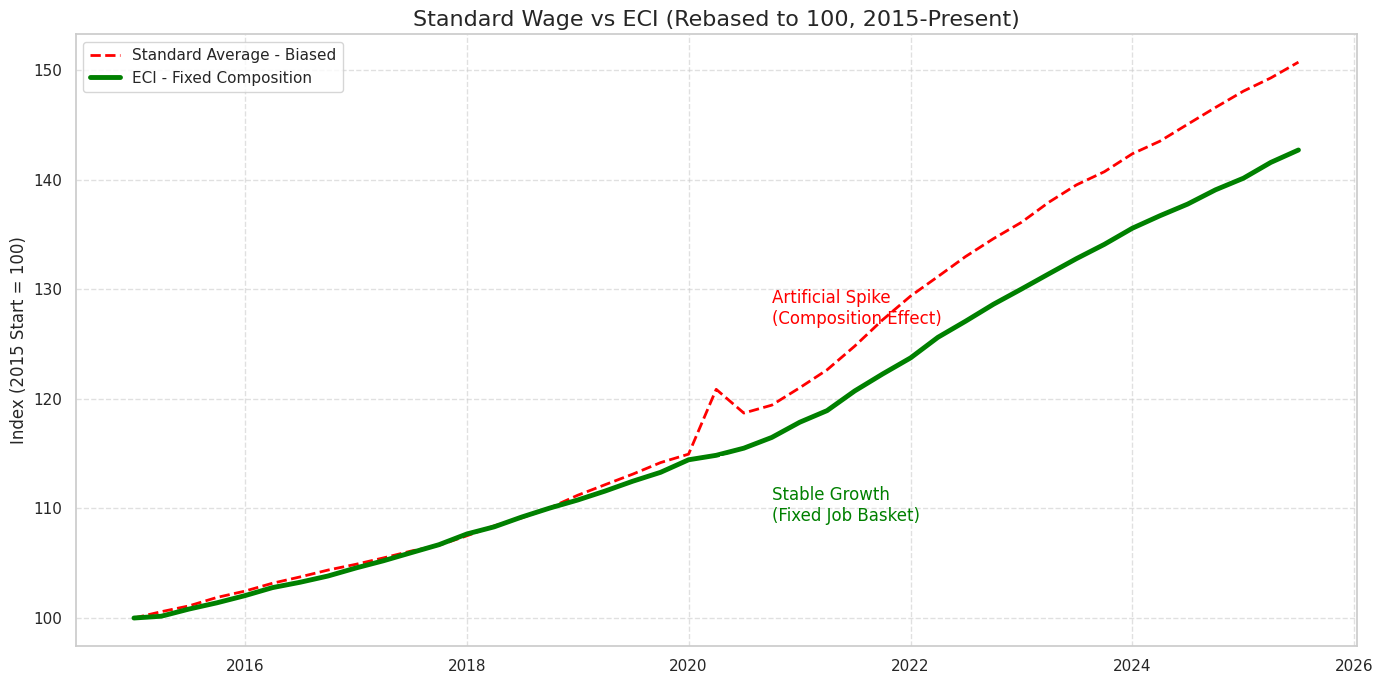

In [31]:
# 1) Fetch the corrective dataset (Employment Cost Index for Wages & Salaries)
eci = fred.get_series("ECIWAG")

# 2) Filter both series from 2015-01-01 onward
start = "2015-01-01"
wages_15 = wages.loc[wages.index >= start].dropna()
eci_15 = eci.loc[eci.index >= start].dropna()

# Align to common dates (helps clean plotting/comparison)
common_idx = wages_15.index.intersection(eci_15.index)
wages_15 = wages_15.loc[common_idx]
eci_15 = eci_15.loc[common_idx]

# 3) Rebase both to 100 at the first observation
wages_rebased = (wages_15 / wages_15.iloc[0]) * 100
eci_rebased = (eci_15 / eci_15.iloc[0]) * 100

# 4) Plot both series
plt.figure(figsize=(14, 7))

plt.plot(
    wages_rebased.index, wages_rebased,
    linestyle="--", color="red", linewidth=2,
    label="Standard Average - Biased"
)

plt.plot(
    eci_rebased.index, eci_rebased,
    linestyle="-", color="green", linewidth=3.5,
    label="ECI - Fixed Composition"
)

plt.title("Standard Wage vs ECI (Rebased to 100, 2015-Present)", fontsize=16)
plt.ylabel("Index (2015 Start = 100)")
plt.xlabel("")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# 5) Annotate the divergence in 2020 (robust nearest-date alignment)
w_2020 = wages_rebased.loc[(wages_rebased.index >= "2020-01-01") & (wages_rebased.index <= "2020-12-31")]
e_2020 = eci_rebased.loc[(eci_rebased.index >= "2020-01-01") & (eci_rebased.index <= "2020-12-31")]

if not w_2020.empty and not e_2020.empty:
    # Peak of biased series in 2020
    w_peak_date = w_2020.idxmax()
    w_peak_val = float(w_2020.max())

    # Get nearest ECI value to that date (returns a Series aligned to the request)
    e_nearest = eci_rebased.reindex([w_peak_date], method="nearest")
    e_date_at = e_nearest.index[0]
    e_val_at = float(e_nearest.iloc[0])

    plt.annotate(
        "Artificial Spike\n(Composition Effect)",
        xy=(w_peak_date, w_peak_val),
        xytext=(w_peak_date + pd.DateOffset(months=6), w_peak_val + 6),
        arrowprops=dict(arrowstyle="->", linewidth=1.5),
        fontsize=12,
        color="red"
    )

    plt.annotate(
        "Stable Growth\n(Fixed Job Basket)",
        xy=(e_date_at, e_val_at),
        xytext=(e_date_at + pd.DateOffset(months=6), e_val_at - 6),
        arrowprops=dict(arrowstyle="->", linewidth=1.5),
        fontsize=12,
        color="green"
    )

plt.tight_layout()
plt.show()